# Capstone - Car Collision Severity (Week 2)

## Introduction

The car is the most-used vehicle of the last century. In 2017 there were almost 1,200,000,000 cars all over the world. Of course, with such a high number of people relaying on cars in their everyday lives, car collisions and accidents happen continously; they have become a regular part of our modern world.

In so many instances, car accidents are fatal for everyone involved. In fact, according to an OMS study in 2015, there were a calculated 1.25 million annual accident-related deaths on the road.

Any car collision is inherently related to other factors, such as a long line of cars on the highway, a problem with the road itself or excessive traffic due to maintenance after another collision.
The company that manages the roads views these collisions as a high expense. To better prepare themselves and avoid these high costs, companies should better predict these collisions and their severity in order to save money and to invest them in innovative infrastructures. 

This can be achieved by studying the data that has been collected in the past years and using a prediction model in order to estimate the severity of future collisions and find solutions to avoid them entirely, thereby saving lives and money in the process.

For example, let's take a look at a database provided by the SDOT Traffic Management Division in Seattle, Washington. We will study the Seattle cases since 2004 using our data science powers to give the best severity prediction of hypothetical future accidents.

## Data

In this specific case, our purpose is find a way to predict the severity level of a collision based on our knowledge of other attributes such as weather conditions, road conditions, light conditions, types of collision and even the description of the collision itself.

For this exercise, we will use a common algorithm, the K-Nearest Neighbors method, which will help us predict the severity level of future accidents by using a portion of the attributes that are stored in the dataset.

For our purposes, let's use the factors that we have just mentioned to create our model: light, road and weather conditions. We will train the model with a large part of the dataset, and then use the remaining part as the test portion.

In this case, according to those attributes, we can predict the severity level and prepare ourselves for how we are going to face an eventual collision. This will help the stakeholders to make important decisions about how to invest their money in the company for the purpose of preventing collisions (alternative roads, traffic limits, new traffic laws, etc.).

## Let's start with the dataset

We can begin by importing the dataset and all of the libraries we will use during this project, including numpy and pandas libraries.

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import matplotlib

In [4]:
df=pd.read_csv("Data-Collisions.csv",header=0)
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


Let's count the different values that our target, the "**SEVERITYCODE**" attribute, has in this dataset:

In [5]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Basically we have 194,673 rows of data, and each row represents a collision. Each column represents a different attribute of that collision (like weather, road condition, latitude, longitude, a description of the accident.

It is important to determine which attributes we would need to use in order to predict our target value, the "**SEVERITYCODE**" attribute. In this case, we will try to build our model basing it on the weather conditions, the light conditions and the road conditions, as I previously stated.

Let's count the different values of the weather that are available in the dataset:

In [6]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Now about the light conditions:

In [7]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

And finally about the road conditions:

In [8]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

Let's have a look at these features in relation to the first 5 collisions in the dataset, including the related target value:

In [9]:
df[['SEVERITYCODE','WEATHER','LIGHTCOND','ROADCOND']].head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,2,Overcast,Daylight,Wet
1,1,Raining,Dark - Street Lights On,Wet
2,1,Overcast,Daylight,Dry
3,1,Clear,Daylight,Dry
4,2,Raining,Daylight,Wet


## Data Cleaning

Unfortunately, for several of the accidents listed, the data collectors failed to record some of the data that we are hoping to study.

For this reason, the best possible way to proceed is to clean the dataset, saving the given data in a different dataset. For example, we can eliminate all the rows that contain at least one "NaN" value in the weather column, the light conditions column or the road conditions column.

After this operation, we will save the result in a new dataset.

In [10]:
df3=df.dropna(subset=['WEATHER','LIGHTCOND','ROADCOND'])
df3

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [43]:
df3[['SEVERITYCODE','WEATHER','LIGHTCOND','ROADCOND']]

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,2,Overcast,Daylight,Wet
1,1,Raining,Dark - Street Lights On,Wet
2,1,Overcast,Daylight,Dry
3,1,Clear,Daylight,Dry
4,2,Raining,Daylight,Wet
...,...,...,...,...
194668,2,Clear,Daylight,Dry
194669,1,Raining,Daylight,Wet
194670,2,Clear,Daylight,Dry
194671,2,Clear,Dusk,Dry


As you can see, we have reduced the number of rows to 189,337 instead of 194,673 so that we can better focus on the critical data.

Let's have a look at the new counts for the weather conditions:

In [11]:
df3['WEATHER'].value_counts()

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

The light conditions:

In [12]:
df3['LIGHTCOND'].value_counts()

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

And the road conditions:

In [13]:
df3['ROADCOND'].value_counts()

Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

As I stated earlier, we have decided to use the K-Nearest Neighbors method to study these cases, with 3 different independent values (**WEATHER CONDITIONS**, **LIGHT CONDITIONS** and **ROAD CONDITIONS**) that will help us to predict the target value, which is the **SEVERITYCODE**.

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [14]:
X = df3[['WEATHER', 'LIGHTCOND', 'ROADCOND']].values
X[0:5]

array([['Overcast', 'Daylight', 'Wet'],
       ['Raining', 'Dark - Street Lights On', 'Wet'],
       ['Overcast', 'Daylight', 'Dry'],
       ['Clear', 'Daylight', 'Dry'],
       ['Raining', 'Daylight', 'Wet']], dtype=object)

Unfortunately, we have an array made of string objects, which we can't use in this particular situation. In order to solve this problem, we can transform the values of each column into a number to code them.

In [15]:
from sklearn import preprocessing
weather = preprocessing.LabelEncoder()
weather.fit(['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
X[:,0] = weather.transform(X[:,0]) 


lightcond = preprocessing.LabelEncoder()
lightcond.fit(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'])
X[:,1] = lightcond.transform(X[:,1])


roadcond = preprocessing.LabelEncoder()
roadcond.fit([ 'Dry', 'Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,2] = roadcond.transform(X[:,2])

X[0:5]


array([[4, 5, 8],
       [6, 2, 8],
       [4, 5, 0],
       [1, 5, 0],
       [6, 5, 8]], dtype=object)

Let's save the "**SEVERITY CODE**" values in the target array "**y**":

In [16]:
y = df3["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

Talking about the independent values, we now need to normalize the data.

In fact, Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.32145781,  0.35007251,  1.4789272 ],
       [ 1.02224659, -1.40094051,  1.4789272 ],
       [ 0.32145781,  0.35007251, -0.71204349],
       [-0.72972538,  0.35007251, -0.71204349],
       [ 1.02224659,  0.35007251,  1.4789272 ]])

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (170403, 3) (170403,)
Test set: (18934, 3) (18934,)


After splitting the dataset, we start giving a value to the parameter "**k**" that will be used in the K-Nearest Neighbors method:

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k = 5
#TrainModel and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

We can now use the model to predict the test set:

In [21]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

We can now print the accuracy scores for the training set and the test set.

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6926051771389001
Test set Accuracy:  0.6968416605049118


We chose a number for the "**k**" parameter but it would be ideal to find the best "**k**" that can give us the most accuracy and that fits the model in the best way. How can we do this? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc 

array([0.64223091, 0.69964086, 0.69578536, 0.7004859 , 0.69684166,
       0.69905989, 0.697317  , 0.69773952, 0.69694729])

Let's plot the results we had for any Ks from 1 to 10, and let's have a look at the trend of this parameter:

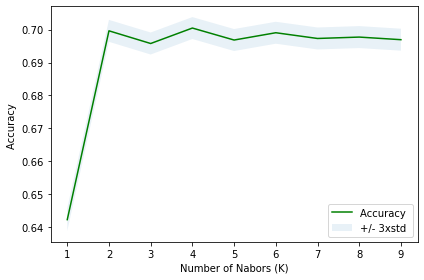

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7004858983838598 with k= 4


It appears that with k=4 we have the best accuracy, with a score of 0.70 out of 1.

Let's have a look at the train set and the test set accuracy scores:

In [26]:
kfinal = 4
#TrainModel and Predict  
neighfin = KNeighborsClassifier(n_neighbors = kfinal).fit(X_train,y_train)
neighfin

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [27]:
yhat = neighfin.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [28]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighfin.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6958034776383045
Test set Accuracy:  0.7004858983838598


As we can see, both sets have a high level of accuracy.

This determines that with 90% of the data used as a training set, and the remaining 10% used as a test set, we can predict the severity of a collision according to the 3 most visible parameters (weather, light and road conditions at the moment of the accident), with an accuracy of 70%.

Using this model and only these three parameters has provided us with a favorable lens through which we can observe the probability of collision.
In fact, if we would have used more attrbiutes as independent variables, we would have had a lower accuracy.
For example, let's say that we want to add the latitude and the longitude of the collisions to the independent parameters.

Let's see what happens and comment on the results.

In [29]:
df4=df.dropna(subset=['WEATHER','LIGHTCOND','ROADCOND','X','Y'])
df4

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [42]:
df4[['SEVERITYCODE','WEATHER','LIGHTCOND','ROADCOND','X','Y']]

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND,X,Y
0,2,Overcast,Daylight,Wet,-122.323148,47.703140
1,1,Raining,Dark - Street Lights On,Wet,-122.347294,47.647172
2,1,Overcast,Daylight,Dry,-122.334540,47.607871
3,1,Clear,Daylight,Dry,-122.334803,47.604803
4,2,Raining,Daylight,Wet,-122.306426,47.545739
...,...,...,...,...,...,...
194668,2,Clear,Daylight,Dry,-122.290826,47.565408
194669,1,Raining,Daylight,Wet,-122.344526,47.690924
194670,2,Clear,Daylight,Dry,-122.306689,47.683047
194671,2,Clear,Dusk,Dry,-122.355317,47.678734


In [30]:
X2 = df4[['WEATHER', 'LIGHTCOND', 'ROADCOND','X','Y']].values
X2[0:5]

array([['Overcast', 'Daylight', 'Wet', -122.32314840000002, 47.70314032],
       ['Raining', 'Dark - Street Lights On', 'Wet', -122.3472943,
        47.64717249],
       ['Overcast', 'Daylight', 'Dry', -122.33453999999999, 47.60787143],
       ['Clear', 'Daylight', 'Dry', -122.3348033, 47.60480289],
       ['Raining', 'Daylight', 'Wet', -122.3064263, 47.54573946]],
      dtype=object)

In [31]:
from sklearn import preprocessing
weather = preprocessing.LabelEncoder()
weather.fit(['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
X2[:,0] = weather.transform(X2[:,0]) 


lightcond = preprocessing.LabelEncoder()
lightcond.fit(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'])
X2[:,1] = lightcond.transform(X2[:,1])


roadcond = preprocessing.LabelEncoder()
roadcond.fit([ 'Dry', 'Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
X2[:,2] = roadcond.transform(X2[:,2])

X2[0:5]

array([[4, 5, 8, -122.32314840000002, 47.70314032],
       [6, 2, 8, -122.3472943, 47.64717249],
       [4, 5, 0, -122.33453999999999, 47.60787143],
       [1, 5, 0, -122.3348033, 47.60480289],
       [6, 5, 8, -122.3064263, 47.54573946]], dtype=object)

In [33]:
y2 = df4["SEVERITYCODE"]
y2[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [34]:
X2 = preprocessing.StandardScaler().fit(X2).transform(X2.astype(float))
X2[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.33993904,  0.35996464,  1.4929756 ,  0.24496811,  1.48708375],
       [ 1.04914549, -1.40571469,  1.4929756 , -0.55942184,  0.49147384],
       [ 0.33993904,  0.35996464, -0.70385178, -0.13452855, -0.20765144],
       [-0.72387063,  0.35996464, -0.70385178, -0.14330006, -0.26223759],
       [ 1.04914549,  0.35996464,  1.4929756 ,  0.80204361, -1.31291503]])

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.1, random_state=5)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (165750, 5) (165750,)
Test set: (18417, 5) (18417,)


In [45]:
k2 = 8
#TrainModel and Predict  
neigh2 = KNeighborsClassifier(n_neighbors = k2).fit(X2_train,y2_train)
neigh2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [46]:
yhat2 = neigh2.predict(X2_test)
yhat2[0:5]

array([1, 1, 1, 1, 2])

In [47]:
print("Train set Accuracy: ", metrics.accuracy_score(y2_train, neigh2.predict(X2_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y2_test, yhat2))

Train set Accuracy:  0.7237345399698341
Test set Accuracy:  0.6728023022207743


In [39]:
Ks2 = 10
mean_acc2 = np.zeros((Ks2-1))
std_acc2 = np.zeros((Ks2-1))
ConfustionMx2 = [];
for n2 in range(1,Ks2):
    
    #Train Model and Predict  
    neigh2 = KNeighborsClassifier(n_neighbors = n2).fit(X2_train,y2_train)
    yhat2=neigh2.predict(X2_test)
    mean_acc2[n2-1] = metrics.accuracy_score(y2_test, yhat2)

    
    std_acc2[n2-1]=np.std(yhat2==y2_test)/np.sqrt(yhat2.shape[0])

mean_acc2 

array([0.60753652, 0.6682413 , 0.63316501, 0.66987023, 0.64625075,
       0.67035891, 0.65444969, 0.6728023 , 0.65977086])

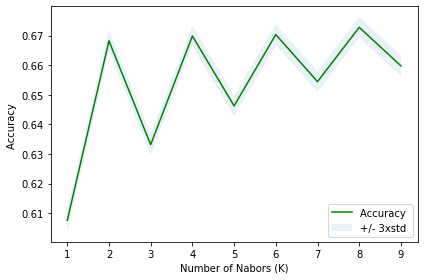

In [40]:
plt.plot(range(1,Ks2),mean_acc2,'g')
plt.fill_between(range(1,Ks2),mean_acc2 - 1 * std_acc2,mean_acc2 + 1 * std_acc2, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc2.max(), "with k=", mean_acc2.argmax()+1) 

The best accuracy was with 0.6728023022207743 with k= 8


As we can see, the model with more variables is less accurate than the first one. In fact, the accuracy in this case is 0.6728 instead of a 0.7004. This means that sometimes “less is more”, meaning that using more parameters is less productive for the scope than using few but important features.

## Conclusion

In conclusion, the K-Nearest Neighbors algorithm provided us with a perspective of what could happen in a situation with varying conditions.

These three parameters were chosen because they represent the top three danger factors for a collision, therefore the study of these three factors combined gives us the background of every possible accident. It is clear that some characteristics of the single collision are difficult to predict, such as the culpable drivers' behaviours or the reactions of the victims right before they are hit.

It is important to understand that, having this information, it is possible to predict and hopefully prevent car collisions, by investing in new infrastructures following these parameters to reduce accidents, consequentially avoiding emergency maintenance and allowing drivers to have a more comfortable and safe driving experience with their families.